In [1]:
!pip install textblob

In [2]:
import pandas as pd
from textblob import TextBlob

In [3]:
df = pd.read_csv("/content/final_dataframe_4790_articles.csv")

In [4]:
df['headline'].fillna("",inplace=True)
df['lead_paragraph'].fillna("",inplace=True)
df['combined_text'] = df['headline'] + " " + df['lead_paragraph']
df['combined_text'] = df['combined_text'].astype(str)
texts = df['combined_text']

In [5]:
def analyze_sentiment(combined_text):
    analysis = TextBlob(combined_text)
    return analysis.sentiment.polarity

In [6]:
df['sentiment_score'] = texts.apply(analyze_sentiment)

In [7]:
df['sentiment_label'] = pd.cut(df['sentiment_score'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

In [8]:
print(df[['combined_text', 'sentiment_score', 'sentiment_label']])

                                          combined_text  sentiment_score  \
0     China hardens rhetoric on Tibet, Taiwan and U....         0.100000   
1     China sees threats from separatists and U.S. a...         0.080000   
2     China Sees Separatist Threats BEIJING  China ...         0.000000   
3     Europe's divisions show through as it welcomes...         0.128788   
4     Obama clings to his BlackBerry WASHINGTON — Pr...        -0.400000   
...                                                 ...              ...   
4785  The U.S. calls China’s repression of the Uighu...         0.015000   
4786  Trump Bequeaths Biden an Upended World PARIS —...         0.272222   
4787  In Confirmation Hearings, Biden Aides Indicate...         0.004495   
4788  China’s Oppression of Muslims in Xinjiang, Exp...         0.065000   
4789  Trump’s Last-Minute Moves Against China Compli...         0.000000   

     sentiment_label  
0            neutral  
1            neutral  
2            neutr

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

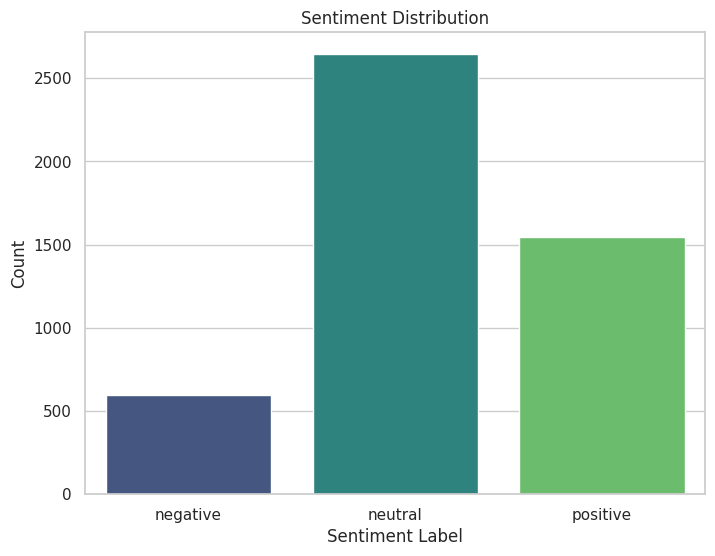

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

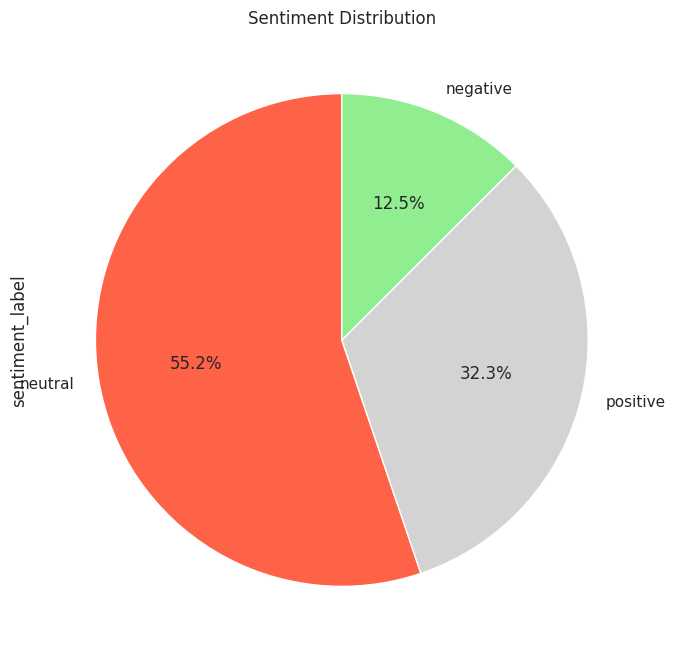

In [11]:
plt.figure(figsize=(8, 8))
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['tomato', 'lightgrey', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.show()

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['year'] = df['date'].dt.year

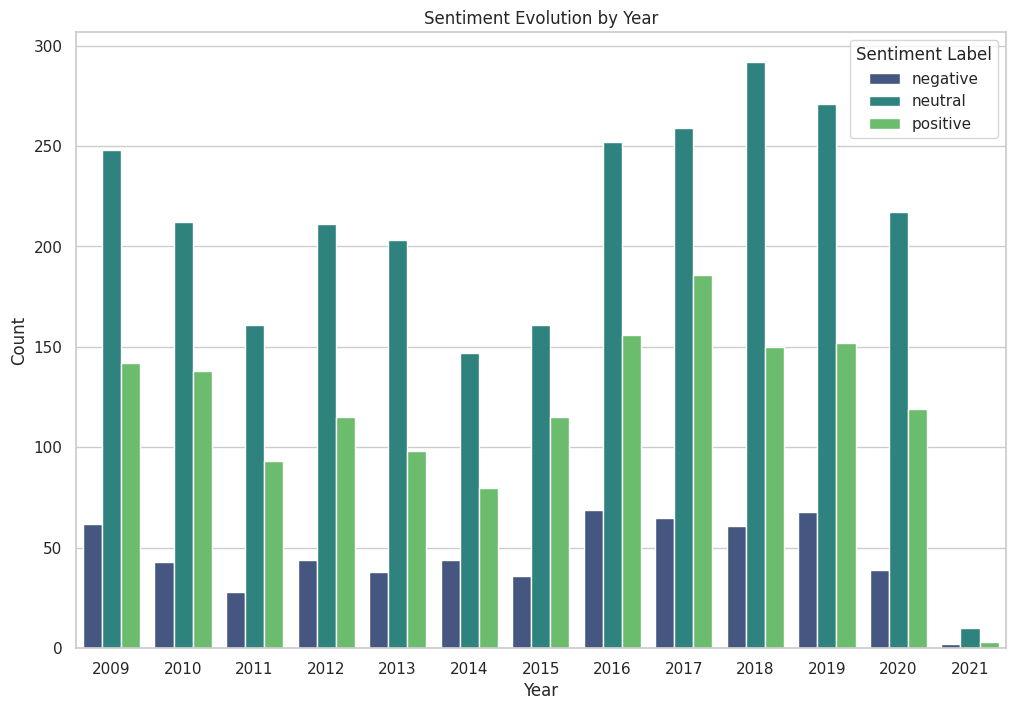

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='year', hue='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Evolution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment Label', loc='upper right')
plt.show()